In [1]:
#Feedback from  v3:
"""
1. To illustrate them better you can make some bar plots representing
the population of a group across different municipalities.

2. Also would be great to plot the two regions independently. As you can
see, there's a large shift beyond 0, so the values are squashed and we
can't tell the difference.
If necessary you can also use log-plots.

3. After these, you can plug in the results coming out of your synthetic
model (Polya) to your segregation calculation pipelines so we will have
similar plots for segregation indexes.

4. The next step would be constructing the second Polya urn model in
which the probability to join an urn is dependent on the proportion of
similar people in the urn (not the raw number).

5. Polya urn network model

make a network model - reflecting a social network of a city and then mapping the network to the municipalities / urns
networkx - package to model a network - 
graph2

"""

"\n1. To illustrate them better you can make some bar plots representing\nthe population of a group across different municipalities.\n\n2. Also would be great to plot the two regions independently. As you can\nsee, there's a large shift beyond 0, so the values are squashed and we\ncan't tell the difference.\nIf necessary you can also use log-plots.\n\n3. After these, you can plug in the results coming out of your synthetic\nmodel (Polya) to your segregation calculation pipelines so we will have\nsimilar plots for segregation indexes.\n\n4. The next step would be constructing the second Polya urn model in\nwhich the probability to join an urn is dependent on the proportion of\nsimilar people in the urn (not the raw number).\n\n5. Polya urn network model\n\nmake a network model - reflecting a social network of a city and then mapping the network to the municipalities / urns\nnetworkx - package to model a network - \ngraph2\n\n"

In [2]:
#creating a polya urn model from Chicago municipality data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns


In [3]:
#read in data
data = pd.read_csv(r'/Users/cristinamaldacena/Documents_Cristina/CSH_Internship/PreliminaryData/Census2020Supplementmuni.csv')
df = pd.DataFrame(data, columns=['GEOID', 'GEOG', 'TOT_POP', 'HISP', 'WHITE', 'BLACK', 'ASIAN'])

In [4]:
races = ['HISP', 'WHITE', 'BLACK', 'ASIAN']

In [36]:
def produce_pu(dataframe, races, v_arg, groupingFactor):
    
    v = v_arg
    
  #  muni_i = len(dataframe)
    muni_i = 10

    races_k = len(races)

    df_pu = pd.DataFrame(np.zeros((muni_i, races_k)))
    df_pu.columns = races

    for k in range(races_k):
        for i in range(muni_i):
            df_pu.loc[i][k] = 1
    
    N = (dataframe[races].sum()).sum()
    smallerN = int(N/groupingFactor)
    print(smallerN)
    # order of which races are chosen
    p_order = np.array(dataframe[races].sum())/N
    races_order = np.random.choice(len(races), smallerN, p=p_order)

    # probability of joining each municipality
    shape = (4, muni_i)
    p_x = np.zeros(shape)
    nonNormProb = np.zeros(shape)
    
    for k in range(races_k):
        tempArray = np.array(pow(df_pu[races[k]], v))
        nonNormProb[k] = tempArray

    for j in range(smallerN):
        #decide which race is next
        k = races_order[j]
        p_x[k] = nonNormProb[k] / nonNormProb[k].sum()
        #print("for race ",race[k]," \n probability is \n", p_x[k])
        municipality = np.random.choice(range(muni_i), p=p_x[k])
        df_pu.loc[municipality][k] += 1
        nonNormProb[k][municipality] = pow(df_pu.loc[municipality][k], v)
        
    return df_pu


In [44]:
# use the proportion of people in each municipality, not the raw number 

def produce_pu2(dataframe, races, v_arg, groupingFactor):
    
    v = v_arg
    
    #muni_i = len(dataframe)
    muni_i = 10
    races_k = len(races)

    df_pu = pd.DataFrame(np.zeros((muni_i, races_k)))
    df_pu.columns = races

    for k in range(races_k):
        for i in range(muni_i):
            df_pu.loc[i][k] = 1
    
    N = (dataframe[races].sum()).sum()
    smallerN = int(N/groupingFactor)
    print(smallerN)
    # order of which races are chosen
    p_order = np.array(dataframe[races].sum())/N
    races_order = np.random.choice(len(races), smallerN, p=p_order)

    # probability of joining each municipality
    shape = (4, muni_i)
    p_x = np.zeros(shape)
    nonNormProb = np.zeros(shape)
    
    for k in range(races_k):
        proportion_k = df_pu[races[k]]/(df_pu[races].sum(axis=1))
        tempArray = np.array(pow(proportion_k, v))
        nonNormProb[k] = tempArray

    for j in range(smallerN):
        #decide which race is next
        k = races_order[j]
        p_x[k] = nonNormProb[k] / nonNormProb[k].sum()
        #print("for race ",race[k]," \n probability is \n", p_x[k])
        municipality = np.random.choice(range(muni_i), p=p_x[k])
        df_pu.loc[municipality][k] += 1
        municipalityNtotal = (df_pu[races].sum(axis = 1))[municipality]
        proportion_k = df_pu.loc[municipality][k] / municipalityNtotal
        nonNormProb[k][municipality] = pow(proportion_k, v)
        
    return df_pu


In [ ]:
# subset of code


    v = v_arg
    
    #muni_i = len(dataframe)
    muni_i = 10
    races_k = len(races)

    df_pu = pd.DataFrame(np.zeros((muni_i, races_k)))
    df_pu.columns = races

    for k in range(races_k):
        for i in range(muni_i):
            df_pu.loc[i][k] = 1
    
    N = (dataframe[races].sum()).sum()
    smallerN = int(N/groupingFactor)
    print(smallerN)
    # order of which races are chosen
    p_order = np.array(dataframe[races].sum())/N
    races_order = np.random.choice(len(races), smallerN, p=p_order)

    # probability of joining each municipality
    shape = (4, muni_i)
    p_x = np.zeros(shape)
    nonNormProb = np.zeros(shape)
    
    for k in range(races_k):
        proportion_k = df_pu[races[k]]/(df_pu[races].sum(axis=1))
        tempArray = np.array(pow(proportion_k, v))
        nonNormProb[k] = tempArray

    for j in range(smallerN):
        #decide which race is next
        k = races_order[j]
        p_x[k] = nonNormProb[k] / nonNormProb[k].sum()
        #print("for race ",race[k]," \n probability is \n", p_x[k])
        municipality = np.random.choice(range(muni_i), p=p_x[k])
        df_pu.loc[municipality][k] += 1
        municipalityNtotal = (df[races].sum(axis = 1))[municipality]
        proportion_k = df_pu.loc[municipality][k] / municipalityNtotal
        nonNormProb[k][municipality] = pow(proportion_k, v)
        


In [43]:


for j in range(smallerN):
    #decide which race is next
    k = races_order[j]
    p_x[k] = nonNormProb[k] / nonNormProb[k].sum()
    #print("for race ",race[k]," \n probability is \n", p_x[k])
    municipality = np.random.choice(range(muni_i), p=p_x[k])
    df_pu.loc[municipality][k] += 1
    municipalityNtotal = (df[races].sum(axis = 1))[municipality]
    proportion_k = df_pu.loc[municipality][k] / municipalityNtotal
    nonNormProb[k][municipality] = pow(proportion_k, v)
        


ValueError: setting an array element with a sequence.

In [21]:
df[races].sum(axis=1)

0      35028
1      28533
2      18545
3      13860
4      75239
       ...  
279    32800
280    24629
281    10554
282    20689
283    23308
Length: 284, dtype: int64

In [ ]:
# calculate exposure index Bkl for each interaction between two groups
def calculateBkl(dataframe, racesArr):
    f1 = dataframe[racesArr]/dataframe[racesArr].sum()
    f2 = dataframe[racesArr].div((dataframe[racesArr].sum(axis = 1)), axis = 0)
    Btest_compact = pd.DataFrame(columns = racesArr, index = racesArr, dtype = 'float')
    for x in racesArr:
        for y in racesArr:
            Btest_compact.loc[x, y] = (f1[x] * f2[y]).sum()
    return Btest_compact

In [ ]:
# calculate Entropy for each interaction between two groups
def calculateH(dataframe, racesArr):
    # calculate H_star first
    N = (dataframe[racesArr].sum()).sum()
    N_k = dataframe[racesArr].sum()
    P_k = N_k / N
    H_star = -1 * (P_k * np.log(P_k)).sum()
    #print("H_star " + str(H_star))
    
    #calculate H_bar 
    P_ik = dataframe[racesArr].div((dataframe[races].sum(axis = 1)), axis = 0)
    Prod1 = P_ik * np.log(P_ik, out=np.zeros_like(P_ik), where=(P_ik!=0)) # need to account for P_ik = 0, set prod1 = 0 without calculating the log
    SumProd1 = Prod1.sum(axis = 1)
    n_i = dataframe[racesArr].sum(axis = 1)
    Prod2 = (n_i/N)*SumProd1
    H_bar = -1* Prod2.sum()
    #print("H_bar " + str(H_bar))
    
    #calculate H
    H = (H_star - H_bar) / H_star
    return H

    # when H_bar = 0 --> 
    # When H = 1 --> 

[-1.  -0.5  0.   0.5  1. ]
780
780
780
780
780


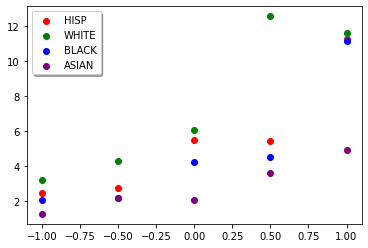

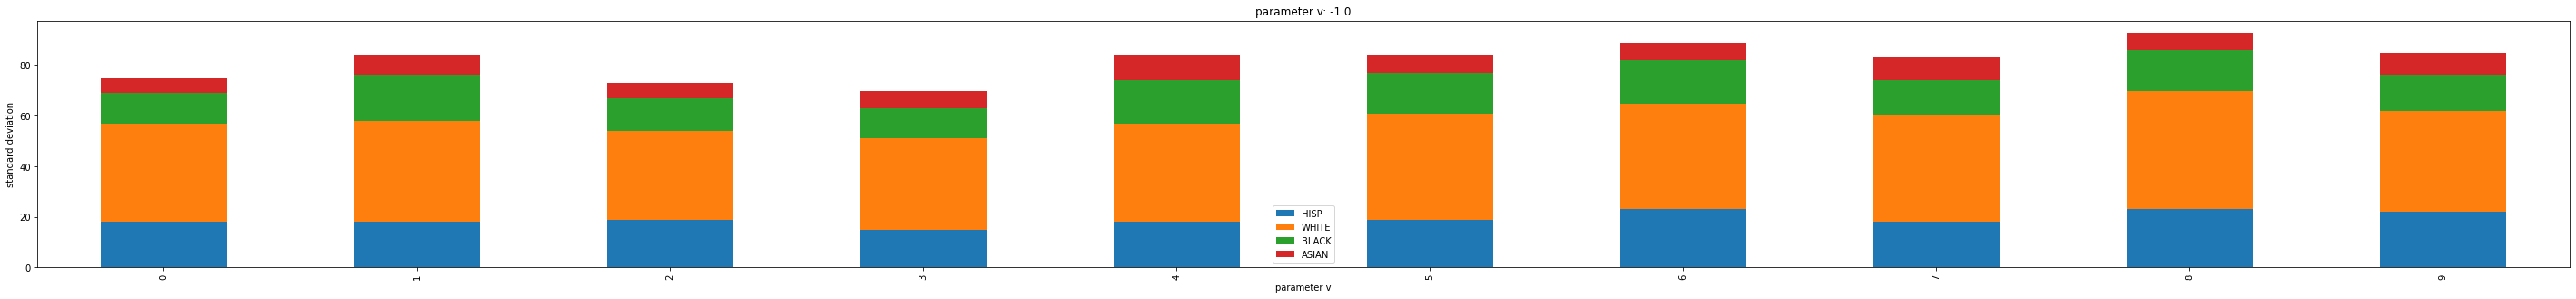

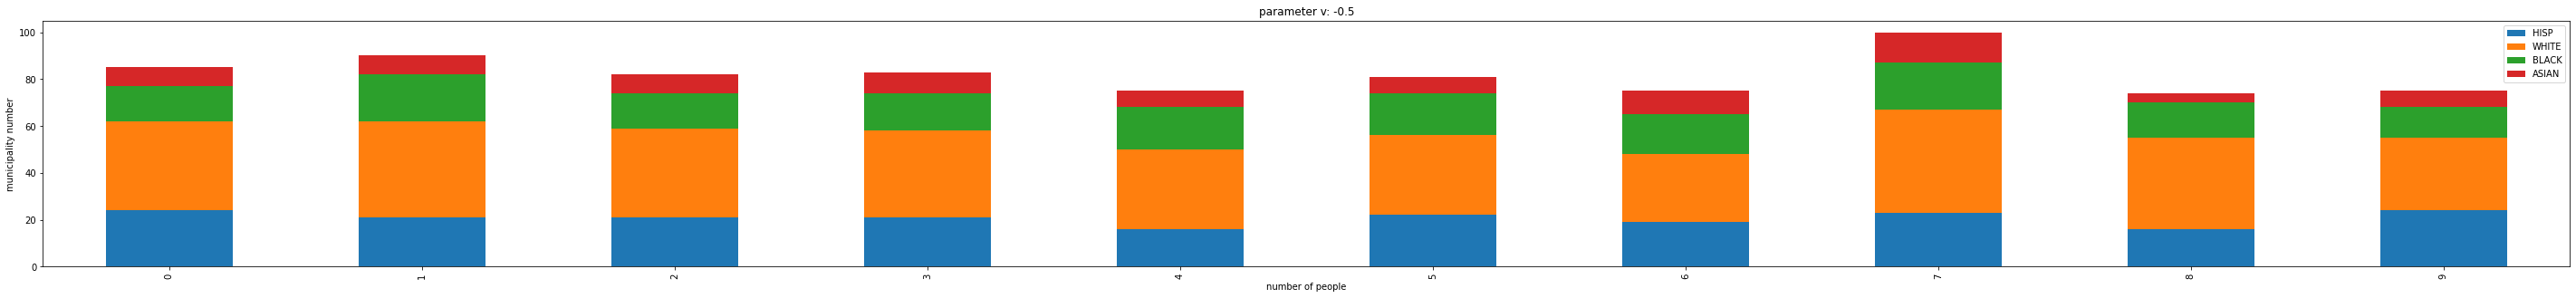

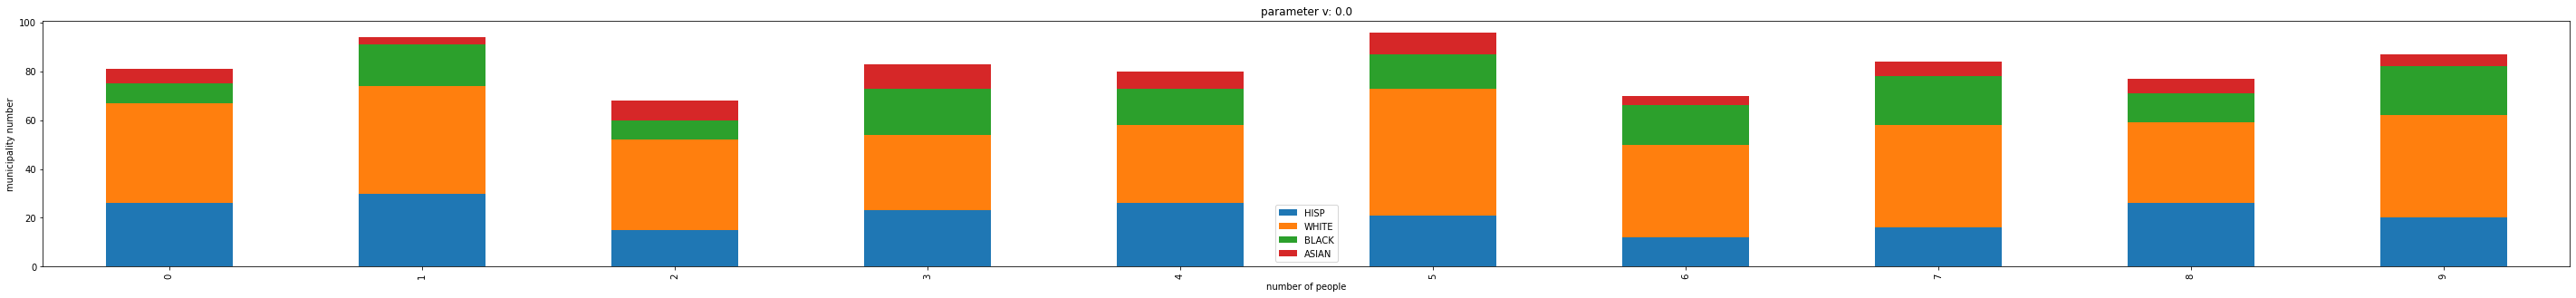

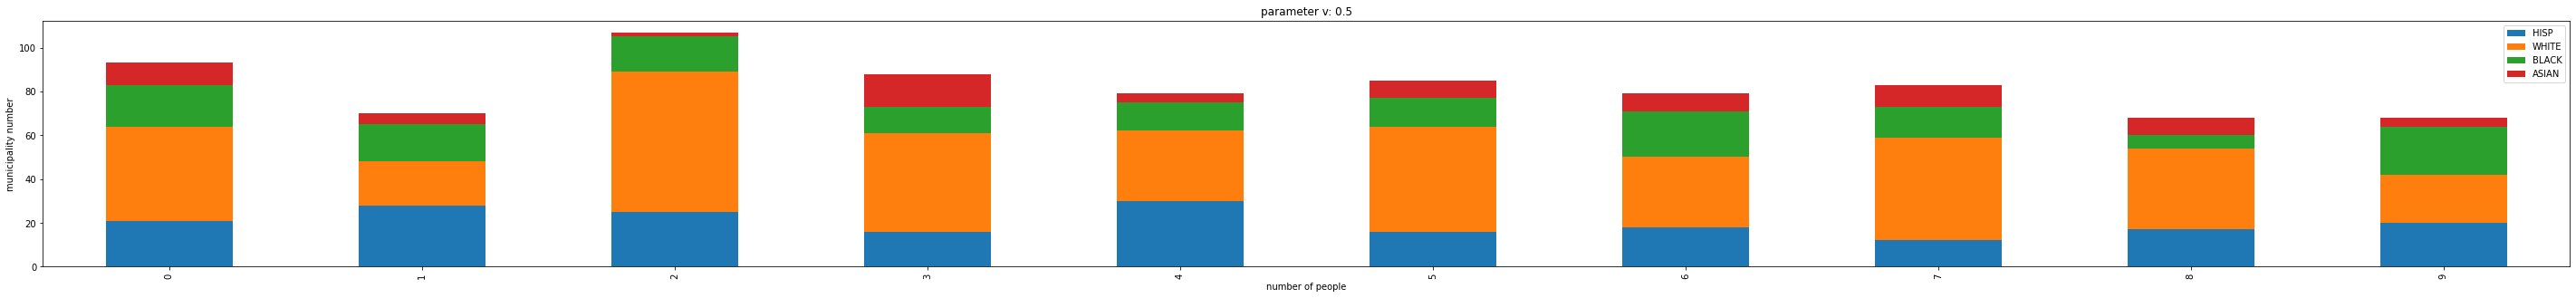

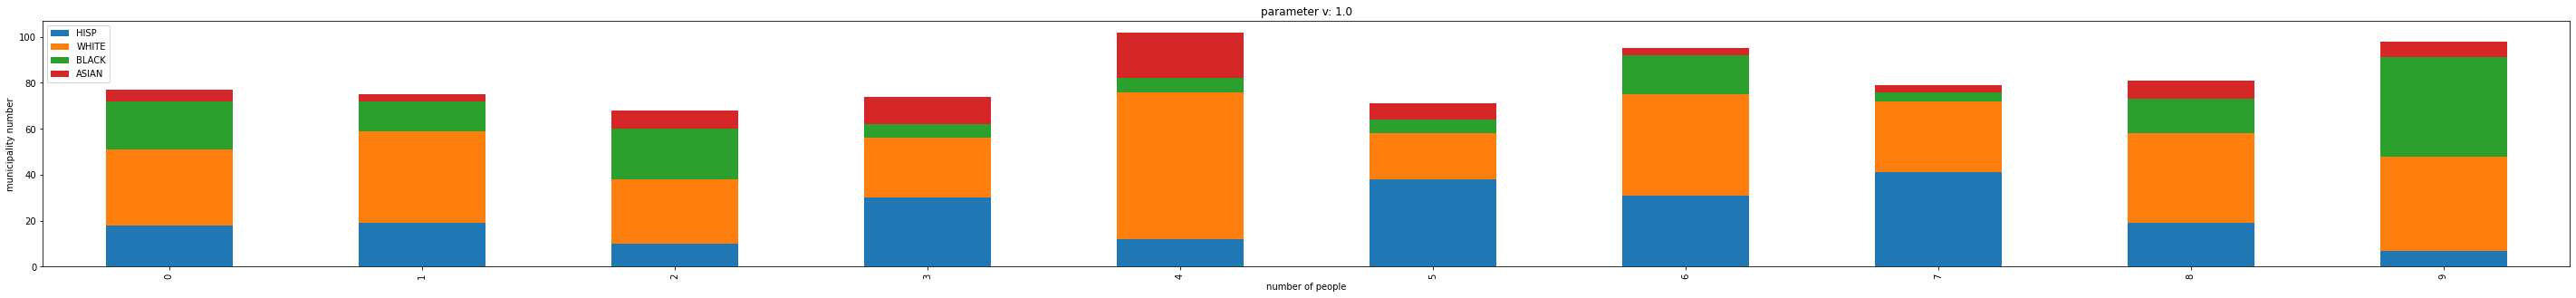

In [46]:
# make v a parameter

v = np.arange(start=-1, stop=1.2, step=0.5, dtype = 'float')
print(v)
    
color = ['RED', 'GREEN', 'BLUE', 'PURPLE']

fig, ax = plt.subplots()
# every race has an stdev per 
for i in range(len(v)):
    df_step = produce_pu2(df, races, v[i], 10000)
    #plot bar graph for each parameter v
    df_step.plot(kind = 'bar', stacked=True, figsize = (50,5)) #do this
    plt.title("parameter v: " + str(v[i]))
    plt.xlabel("number of people")
    plt.ylabel("municipality number")
    #print(df_step)
    stdev = np.std(df_step[races])
    for j in range(4):
        if i == 0:
            ax.scatter(v[i],stdev[races[j]],color = color[j], label = races[j])
            plt.xlabel("parameter v")
            plt.ylabel("standard deviation")
            legend = ax.legend(loc='upper left', shadow=True)
        else:
            ax.scatter(v[i],stdev[races[j]],color = color[j])
            
plt.show()



# stdev on y axis and v on x axis

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
780
780
780
780
780
780
780
780
780


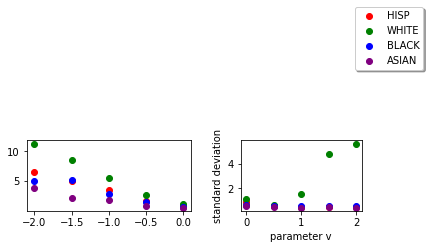

In [39]:
# make v a parameter; plot -1 to 0 independently from 0 to 1

v = np.arange(start=-2, stop=2.2, step=0.5, dtype = 'float')
print(v)
    
color = ['RED', 'GREEN', 'BLUE', 'PURPLE']

plot1 = plt.subplot2grid((12, 8), (0, 0), rowspan=4, colspan = 4)
plot2 = plt.subplot2grid((12, 8), (0, 5), rowspan=4, colspan = 6)
# every race has an stdev per 
for i in range(len(v)):
    df_step = produce_pu2(df, races, v[i], 10000)
    stdev = np.std(df_step[races])
    for j in range(4):
        if i == 0:
            plot1.scatter(v[i],stdev[races[j]],color = color[j], label = races[j])
            plt.xlabel("parameter v")
            plt.ylabel("standard deviation")
            legend = plot1.legend(loc=(2,2), shadow=True)
        else:
            if v[i] > 0.0:
                plot2.scatter(v[i],stdev[races[j]],color = color[j])
            elif v[i] == 0:
                plot1.scatter(v[i],stdev[races[j]],color = color[j])
                plot2.scatter(v[i],stdev[races[j]],color = color[j])
            else:
                plot1.scatter(v[i],stdev[races[j]],color = color[j])
plt.show()
    

# separate into two figures

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
7805
Entropy measure for  -2.0 is: 
 0.007916071705954186
Exposure index measure for  -2.0 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.250372  0.465476  0.176962  0.107190
WHITE  0.243789  0.472488  0.176800  0.106922
BLACK  0.243836  0.465141  0.184181  0.106842
ASIAN  0.244577  0.465812  0.176923  0.112688


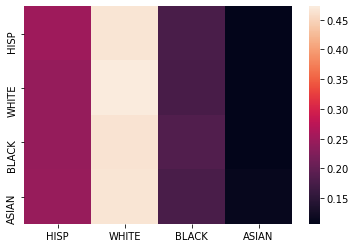

7805
Entropy measure for  -1.5 is: 
 0.008984398571605585
Exposure index measure for  -1.5 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.260861  0.454179  0.187439  0.097522
WHITE  0.254025  0.461436  0.187114  0.097425
BLACK  0.254254  0.453802  0.194322  0.097622
ASIAN  0.253735  0.453211  0.187248  0.105806


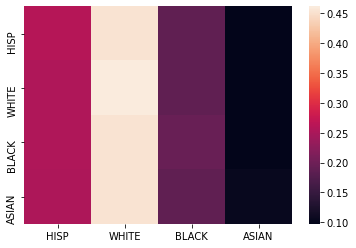

7805
Entropy measure for  -1.0 is: 
 0.012891201123863038
Exposure index measure for  -1.0 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.266212  0.450427  0.182246  0.101115
WHITE  0.254955  0.461605  0.182448  0.100993
BLACK  0.255166  0.451300  0.192264  0.101270
ASIAN  0.255110  0.450160  0.182485  0.112245


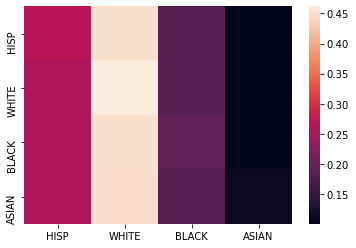

7805
Entropy measure for  -0.5 is: 
 0.01781585631070094
Exposure index measure for  -0.5 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.266144  0.450975  0.177041  0.105841
WHITE  0.249784  0.467155  0.176684  0.106377
BLACK  0.250614  0.451562  0.191604  0.106219
ASIAN  0.249970  0.453595  0.177216  0.119218


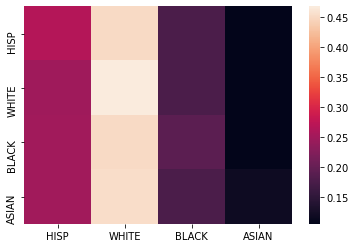

7805
Entropy measure for  0.0 is: 
 0.03185108752803676
Exposure index measure for  0.0 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.278891  0.444174  0.172858  0.104076
WHITE  0.247982  0.471643  0.176969  0.103406
BLACK  0.244312  0.448007  0.202460  0.105221
ASIAN  0.250221  0.445300  0.178986  0.125493


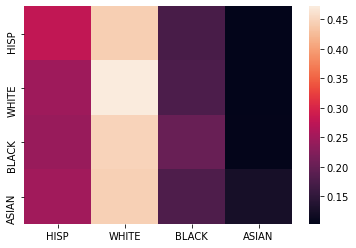

7805
Entropy measure for  0.5 is: 
 0.07038903558184201
Exposure index measure for  0.5 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.301752  0.424463  0.176344  0.097441
WHITE  0.232806  0.501240  0.169055  0.096899
BLACK  0.243037  0.424800  0.232551  0.099612
ASIAN  0.242317  0.439346  0.179739  0.138598


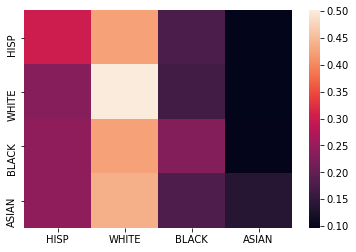

7805
Entropy measure for  1.0 is: 
 0.18753896037153955
Exposure index measure for  1.0 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.408265  0.340277  0.161200  0.090257
WHITE  0.187198  0.581344  0.148158  0.083300
BLACK  0.215759  0.360463  0.322311  0.101466
ASIAN  0.236991  0.397580  0.199053  0.166377


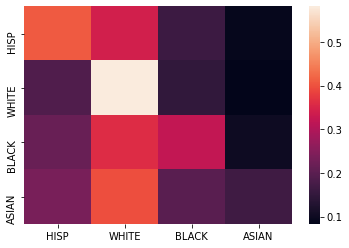

7805
Entropy measure for  1.5 is: 
 0.5542204751867987
Exposure index measure for  1.5 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.702356  0.128792  0.102025  0.066827
WHITE  0.071894  0.818184  0.063662  0.046261
BLACK  0.140986  0.157597  0.587293  0.114124
ASIAN  0.169437  0.210122  0.209396  0.411045


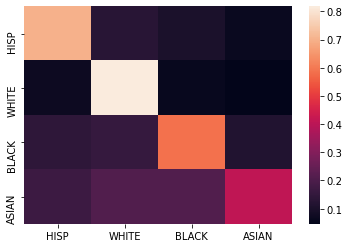

7805
Entropy measure for  2.0 is: 
 0.7885876909471842
Exposure index measure for  2.0 is: 
            HISP     WHITE     BLACK     ASIAN
HISP   0.871916  0.041716  0.041561  0.044807
WHITE  0.023185  0.927258  0.024633  0.024924
BLACK  0.058709  0.062610  0.806175  0.072506
ASIAN  0.111385  0.111482  0.127595  0.649538


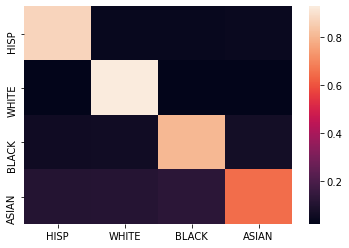

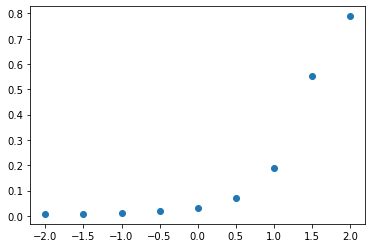

In [82]:
# calculate segregation indices from all simulated vs

# make v a parameter; plot -1 to 0 independently from 0 to 1

v = np.arange(start=-2, stop=2.2, step=0.5, dtype = 'float')
print(v)

#stored entropy measure
H_all = np.zeros(len(v))

# every race has an stdev per 
for i in range(len(v)):
    df_step = produce_pu(df, races, v[i], 1000)
    
    #calculate entropy
    H_all[i] = calculateH(df_step, races)
    print("Entropy measure for ",v[i], "is: \n", H_all[i])
    #calculate segregation measures
    Bkl_df_step = calculateBkl(df_step, races)
    print("Exposure index measure for ",v[i], "is: \n", Bkl_df_step)
    sns.heatmap(Bkl_df_step)
    plt.show()
    
plt.scatter(v, H_all)
plt.show()


In [83]:
"""4. The next step would be constructing the second Polya urn model in
which the probability to join an urn is dependent on the proportion of
similar people in the urn (not the raw number).
"""

def produce_pu2(dataframe, races, v_arg, groupingFactor):
    
    muni_i = len(dataframe)
    races_k = len(races)

    v = v_arg #parameter

    df_pu = pd.DataFrame(np.zeros((muni_i, races_k)))
    df_pu.columns = races

    for k in range(races_k):
        for i in range(muni_i):
            df_pu.loc[i][k] = 1
    
    N = (dataframe[races].sum()).sum()
    smallerN = int(N/groupingFactor)
    print(smallerN)
    # order of which races are chosen
    p_order = np.array(dataframe[races].sum())/N
    races_order = np.random.choice(len(races), smallerN, p=p_order)

    # probability of joining each municipality
    p_x_0 = np.zeros(muni_i)
    p_x_1 = np.zeros(muni_i)
    p_x_2 = np.zeros(muni_i)
    p_x_3 = np.zeros(muni_i)
    
    nonNormProb_0 = np.array(pow(df_pu[races[0]], v))
    nonNormProb_1 = np.array(pow(df_pu[races[1]], v))
    nonNormProb_2 = np.array(pow(df_pu[races[2]], v))
    nonNormProb_3 = np.array(pow(df_pu[races[3]], v))
    
    for j in range(smallerN):
        #decide which race is next
        # sum of people in a municipality
        k = races_order[j]
        # create array of P(x) probabilitiy of current polya falling in each urn / municipality
        if k == 0:
            p_x_0 = nonNormProb_0 / nonNormProb_0.sum() 
            municipality = np.random.choice(range(muni_i), p=p_x_0)
            df_pu.loc[municipality][k] += 1
            nonNormProb_0[municipality] = pow((df_pu.loc[municipality][0])/((df[races].sum(axis = 1))[municipality]), v) 
        elif k == 1:
            p_x_1 = nonNormProb_1 / nonNormProb_1.sum()
            municipality = np.random.choice(range(muni_i), p=p_x_1)
            df_pu.loc[municipality][k] += 1
            nonNormProb_1[municipality] = pow(df_pu.loc[municipality][1]/((df[races].sum(axis = 1))[municipality]), v) 
        elif k == 2:
            p_x_2 = nonNormProb_2 / nonNormProb_2.sum()
            municipality = np.random.choice(range(muni_i), p=p_x_2)
            df_pu.loc[municipality][k] += 1
            nonNormProb_2[municipality] = pow(df_pu.loc[municipality][2]/((df[races].sum(axis = 1))[municipality]), v)
        else:
            p_x_3 = nonNormProb_3 / nonNormProb_3.sum()
            municipality = np.random.choice(range(muni_i), p=p_x_3)
            df_pu.loc[municipality][k] += 1
            nonNormProb_3[municipality] = pow(df_pu.loc[municipality][3]/((df[races].sum(axis = 1))[municipality]), v) 
            
    return df_pu

# create 2D array for each probability P_x[0]


[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
7805
7805
7805
7805
7805
7805
7805
7805
7805


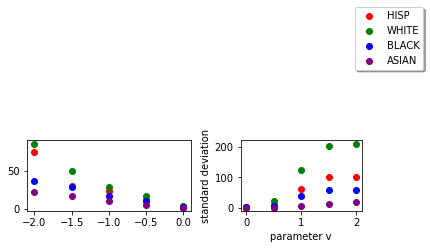

In [84]:
# plotting results of model proportional to number of similar people

# make v a parameter; plot -1 to 0 independently from 0 to 1

v = np.arange(start=-2, stop=2.2, step=0.5, dtype = 'float')
print(v)
    
color = ['RED', 'GREEN', 'BLUE', 'PURPLE']

plot1 = plt.subplot2grid((12, 8), (0, 0), rowspan=4, colspan = 4)
plot2 = plt.subplot2grid((12, 8), (0, 5), rowspan=4, colspan = 6)
# every race has an stdev per 
for i in range(len(v)):
    df_step = produce_pu2(df, races, v[i], 1000)
    #plot bar graph for each parameter v
    # df_step.plot(kind = 'barh', stacked=True, figsize = (5,100)) #do this
    # plt.title("parameter v: " + str(v[i]))
    # plt.xlabel("number of people")
    # plt.ylabel("municipality number")
    #print(df_step)
    stdev = np.std(df_step[races])
    for j in range(4):
        if i == 0:
            plot1.scatter(v[i],stdev[races[j]],color = color[j], label = races[j])
            plt.xlabel("parameter v")
            plt.ylabel("standard deviation")
            legend = plot1.legend(loc=(2,2), shadow=True)
        else:
            if v[i] > 0.0:
                plot2.scatter(v[i],stdev[races[j]],color = color[j])
            elif v[i] == 0:
                plot1.scatter(v[i],stdev[races[j]],color = color[j])
                plot2.scatter(v[i],stdev[races[j]],color = color[j])
            else:
                plot1.scatter(v[i],stdev[races[j]],color = color[j])
plt.show()
    

SyntaxError: invalid syntax (<ipython-input-48-283dec3fffdb>, line 1)